# <center>Bibliotecas utilizadas</center>

In [1]:
from fastkan import FastKAN as KAN

import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import *
from torch.utils.data import DataLoader

# <center>Pré-processamento dos dados</center>

In [2]:
train_path = 'Dataset/train'
test_path = 'Dataset/test'

In [3]:
transform_train = transforms.Compose(
    [transforms.Resize(size = (164,164)),
     transforms.RandomRotation(degrees=15),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

transform_test = transforms.Compose(
    [transforms.Resize(size = (164,164)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform = transform_train)
test_dataset = datasets.ImageFolder(test_path, transform = transform_test)

In [5]:
trainloader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 90, shuffle = True)

# <center>Implementação da arquitetura *fastKAN*</center>

In [6]:
model = KAN([164*164*3, 164, 64, 3])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

FastKAN(
  (layers): ModuleList(
    (0): FastKANLayer(
      (layernorm): LayerNorm((80688,), eps=1e-05, elementwise_affine=True)
      (rbf): RadialBasisFunction()
      (spline_linear): SplineLinear(in_features=645504, out_features=164, bias=False)
      (base_linear): Linear(in_features=80688, out_features=164, bias=True)
    )
    (1): FastKANLayer(
      (layernorm): LayerNorm((164,), eps=1e-05, elementwise_affine=True)
      (rbf): RadialBasisFunction()
      (spline_linear): SplineLinear(in_features=1312, out_features=64, bias=False)
      (base_linear): Linear(in_features=164, out_features=64, bias=True)
    )
    (2): FastKANLayer(
      (layernorm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (rbf): RadialBasisFunction()
      (spline_linear): SplineLinear(in_features=512, out_features=3, bias=False)
      (base_linear): Linear(in_features=64, out_features=3, bias=True)
    )
  )
)

In [7]:
num_epoch = 250
learning_rate = 0.001

In [8]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [9]:
train_losses = []
train_acc = []

training_start_time = time.time()

for epoch in range(num_epoch):
    model.train()
    running_train_loss = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.view(-1, 164*164*3).to(device)
        labels = labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    _, predicted = torch.max(outputs.data, 1)

    acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
    train_acc.append(acc)

    print(f"Época {epoch + 1}/{num_epoch} - Perda no treinamento: {train_loss:.6f} - Acurácia: {acc:.6f}")

training_time = time.time() - training_start_time
print(f"Tempo total de treinamento: {training_time:.2f} segundos")

Época 1/250 - Perda no treinamento: 15.518120 - Acurácia: 0.300000
Época 2/250 - Perda no treinamento: 4.458144 - Acurácia: 0.833333
Época 3/250 - Perda no treinamento: 3.589285 - Acurácia: 0.700000
Época 4/250 - Perda no treinamento: 1.475036 - Acurácia: 1.000000
Época 5/250 - Perda no treinamento: 0.740173 - Acurácia: 0.833333
Época 6/250 - Perda no treinamento: 0.499348 - Acurácia: 0.800000
Época 7/250 - Perda no treinamento: 0.427322 - Acurácia: 0.966667
Época 8/250 - Perda no treinamento: 0.235051 - Acurácia: 0.900000
Época 9/250 - Perda no treinamento: 0.126150 - Acurácia: 0.933333
Época 10/250 - Perda no treinamento: 0.143726 - Acurácia: 0.966667
Época 11/250 - Perda no treinamento: 0.086090 - Acurácia: 0.933333
Época 12/250 - Perda no treinamento: 0.106476 - Acurácia: 1.000000
Época 13/250 - Perda no treinamento: 0.073678 - Acurácia: 1.000000
Época 14/250 - Perda no treinamento: 0.108980 - Acurácia: 0.966667
Época 15/250 - Perda no treinamento: 0.076094 - Acurácia: 0.966667
Épo

Text(0.5, 0.98, 'Treinamento')

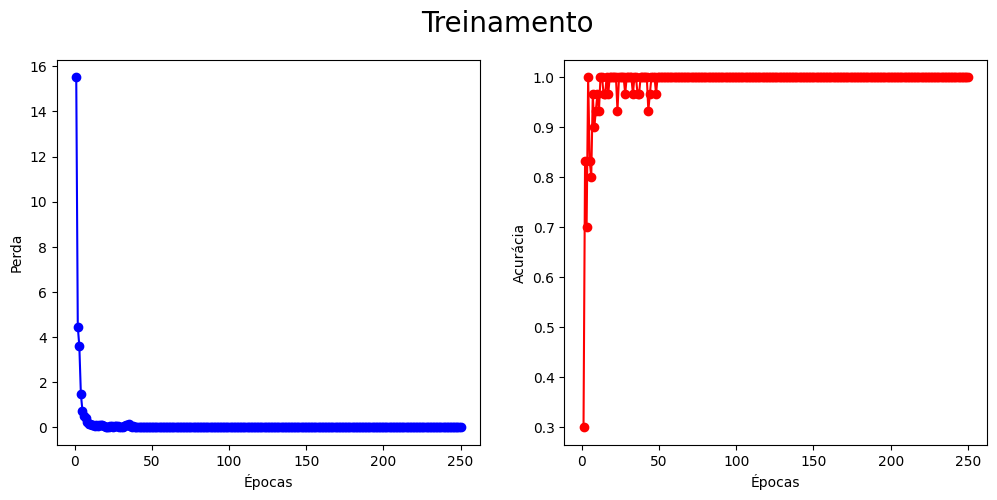

In [10]:
epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'ro-')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.suptitle("Treinamento", fontsize = 20)

In [11]:
model.eval()
    
with torch.no_grad():
        
    for images, labels in testloader:
        images = images.view(-1, 164*164*3).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        acc = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
        
print(f"Acurácia: {acc:.6f}")

Acurácia: 0.922222


# <center>Métricas de avaliação</center>

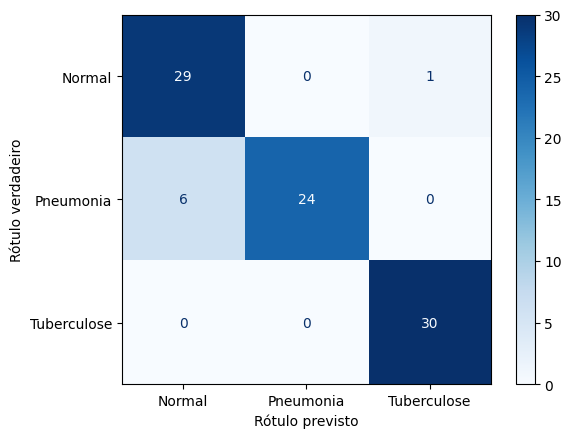

In [12]:
cm = confusion_matrix(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculose'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

In [13]:
print(classification_report(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), target_names=['Normal', 'Pneumonia', 'Tuberculose']))

              precision    recall  f1-score   support

      Normal       0.83      0.97      0.89        30
   Pneumonia       1.00      0.80      0.89        30
 Tuberculose       0.97      1.00      0.98        30

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.93      0.92      0.92        90



In [15]:
precision = precision_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"Precisão: {precision * 100 :.2f}%")

Precisão: 93.21%


In [16]:
recall = recall_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"Recall: {recall * 100 :.2f}%")

Recall: 92.22%


In [17]:
f1 = f1_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), average='weighted')
print(f"F1 Score: {f1 * 100 :.2f}%")

F1 Score: 92.16%
